# Python Exercises

As mentioned in **Python 101**, the best way to learn programming is to '*Practice! Practice! Practice!*'. Now let's put our knowledge into practice.

In [40]:
import pandas as pd
import numpy as np

In [50]:
se = pd.Series({'a':1,'b':2, 'c':3, 'd':4})
se

a    1
b    2
c    3
d    4
dtype: int64

In [55]:
se %2 == 1

a     True
b    False
c     True
d    False
dtype: bool

In [61]:
True in (se %2 == 1).values

True

## Problem 1 (List, Set, Iteration, Operators)

John works at a clothing store. He has a large pile of socks that he must pair by color for sale. Given an array of integers representing the color of each sock, determine how many pairs of socks with matching colors there are.

**Requirement**

Write a <code>sockMerchant</code> function which must return an integer representing the number of matching pairs of socks that are available.

<code>sockMerchant</code> has the following parameter(s):
- n: the number of socks in the pile (integers from 1 to 100)
- ar: the colors of each sock (represented as integers from 1 to 100)

*Example*

<code>ar = [10, 20, 20, 10, 10, 30, 50, 10, 20]</code>

<code>sockMerchant(ar)</code>

output: 3

In [62]:
def sockMerchant(ar):
    colors = set(ar)
    pairs = 0
    for color  in colors:
        pairs += ar.count(color) // 2
    return pairs

In [64]:
set([10, 20, 20, 10, 10, 30, 50, 10, 20])

{10, 20, 30, 50}

In [65]:
ar = [10, 20, 20, 10, 10, 30, 50]
sockMerchant(ar)

2

## Problem 2 (String, Iteration, Conditions)

Gary is an avid hiker. He tracks his hikes meticulously, paying close attention to small details like topography. During his last hike he took exactly <code>n</code> steps. For every step he took, he noted if it was an uphill,<code>U</code> , or a downhill, <code>D</code> step. Gary's hikes start and end at sea level and each step up or down represents a <code>1</code> unit change in altitude. We define the following term:
- A valley is a sequence of consecutive steps below sea level, starting with a step down from sea level and ending with a step up to sea level.

**Requirement**

Given Gary's sequence of up and down steps during his last hike, find and print the number of valleys he walked through by writing a <code>countingValleys</code> function.

Parameter:
- s: a string of n characters that describe his path.

*Example*

<code>s = 'UDDDUDUU'</code>

<code>countingValleys(s)</code>

output: 1

In [66]:
def countingValleys(s):
    level = 0
    valleys = 0
    for ch in s:
        prevLevel = level
        level += (1 if ch == 'U' else -1)
        if level == -1 and prevLevel == 0:
            valleys += 1
            
    return valleys

In [68]:
s = 'UDDDUDUUDUUUDDDUU'
countingValleys(s)

3

## Problem 3 (Loop, Conditions)

Emma is playing a new mobile game that starts with consecutively numbered clouds. Some of the clouds are **thunderheads** and others are **cumulus**. She can jump on any cumulus cloud having a number that is equal to the number of the current cloud plus $1$ or $2$. She must avoid the thunderheads. Determine the minimum number of jumps it will take Emma to jump from her starting postion to the last cloud. **It is always possible to win the game.**

For each game, Emma will get an array of clouds numbered $0$ if they are safe or $1$ if they must be avoided. For example, <code>c=[0,1,0,0,0,1,0]</code> indexed from $0\dots6$. The number on each cloud is its index in the list so she must avoid the clouds at indexes $1$ and $5$. She could follow the following two paths: $0\rightarrow2\rightarrow4\rightarrow6$ or $0\rightarrow2\rightarrow3\rightarrow4\rightarrow6$. The first path takes $3$ jumps while the second takes $4$.

**Requirement**

Write a <code>jumpingOnClouds(c)</code> function which returns the **minimum** number of jumps required, as an integer.

Parameter:
- c: an array of binary integers

*Example*

<code>c = [0, 0, 1, 0, 0, 1, 0]</code>

<code>jumpingOnClouds(c)</code>

output: 4

In [75]:
def jumpingOnClouds(c):
    jumps = 0
    position = 0
    while position < len(c) - 1:
        if position == len(c) - 2:
            jumps += 1
            break
        if c[position + 2] == 0:
            jumps += 1
            position += 2
        else:
            jumps += 1
            position += 1
    
    return jumps

In [76]:
c = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
jumpingOnClouds(c)

7

## Problem 4 (String, Dictionary, List)

Sherlock considers a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just 1 character at 1 index in the string, and the remaining characters will occur the same number of times. 

Given a string <code>s</code>, determine if it is valid. If so, return YES, otherwise return NO.

For example, if <code>s = abc</code>, it is a valid string because frequencies are <code>{'a': 1, 'b': 1, 'c': 1}</code>. So is <code>s = abcc</code> because we can remove one <code>c</code> and have 1 of each character in the remaining string. If <code>s = abccc</code> however, the string is not valid as we can only remove 1 occurrence of <code>c</code>. That would leave character frequencies of <code>{'a': 1, 'b': 1, 'c': 2}.</code>

**Requirement**

Write a function <code>is_valid</code> with input being a single string <code>s</code> that returns YES if the string is valid and otherwise NO.

Note:
1. The string will be at least 1 character in length and will be lowercase letters only.
2. No need to use advanced packages such as <code>numpy</code> or <code>pandas</code>.

In [8]:
def is_valid(s):
    # char_count = {c: s.count(c) for c in set(s)}
    char_count = {}
    for c in s:
        if c in char_count:
            char_count[c] += 1
#             char_count.update({c:countnumber})
# char_count.get(c, 0)
        else:
            char_count[c] = 1
    count_set = set(char_count.values())
    if len(count_set) == 1:
        return 'YES'
    elif len(count_set) > 2:
        return 'NO'
    else:
        char_count_values_list = list(char_count.values())
        min_count = min(char_count_values_list)
        max_count = max(char_count_values_list)
        if (char_count_values_list.count(min_count) == 1 and min_count == 1) or \
        (char_count_values_list.count(max_count) == 1 and max_count - min_count == 1):
            return 'YES'
        else:
            return 'NO'

In [9]:
is_valid('aaabbbcccd')

'YES'

## Problem 5 (Recursion)

Find the number of ways that a given integer $X$ can be expressed as the sum of the $N^{th}$ powers of **unique**, natural numbers.

For example, if $X=13$ and $N=2$, we have to find all the combinations of unique squares adding up to $13$. The only solution is $2^2+3^2$.

As another example, if $X=100$ and $N=2$, we have $100=10^2=6^2+8^2=1^2+3^2+4^2+5^2+7^2$.

**Requirement**

Write a function <code>powerSum</code> that returns an integer that represents the number of possible combinations.

Parameters:
- X: the integer to sum to. ($1 \le X \le1000$)
- N: the integer power to raise number to. ($2\le N\le10$)

*Example*

<code>X = 10</code>

<code>N = 2</code>

<code>powerSum(X, N)</code>

output: 1

In [10]:
import math
##private
_cache_dict = {}
## private
def _get_accurate_power_floor(X, N):
    """This is to solve a precision issue in python where for example 1000**(1/3) = 9.999999999999998,
       which can lead to powerSum(1000, 3) -> 0.
    """
    initial_res = math.floor(X ** (1/N))
    if (initial_res + 1) ** N > X:
        return initial_res
    else:
        return initial_res + 1
## private
def _powerSum(X, N, maxNum):
    count = _cache_dict.get((X, N, maxNum))
    if count is None:
        count = 0
        for i in range(1, maxNum+1):
            if i ** N == X:
                count += 1
            else:
                count += _powerSum(X-i**N, N, min(i-1, _get_accurate_power_floor((X-i**N), N)))
        _cache_dict[(X, N, maxNum)] = count
    return count

def powerSum(X, N):
    res = _powerSum(X, N, _get_accurate_power_floor(X, N))
    _cache_dict.clear() # so that the dict won't grow forever
    return res

In [77]:
def fibb(n):
    if n >= 2:
        return fibb(n-1) + fibb(n-2)
    elif n==1 or n==0:
        return 1
## 1 1 2 3 5 8 ... 

In [80]:
1000**(1/3)

9.999999999999998

In [82]:
powerSum(1000, 3)

1

In [16]:
1000 ** (1/3)

9.999999999999998

In [84]:
_get_accurate_power_floor(1000, 3)

10

## Problem 6 (Regression with numpy)      

Linear Regression is the model to describe linear relationship between two datasets, for $X$ and $Y$ with length N, we need to estimate $Y_i = m + bX_i + e_i$, try to minimize $\Sigma_{i=1}^{N}e_i^2$, can you try to implement an algorithm in numpy for this univariable regression? 

In [85]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

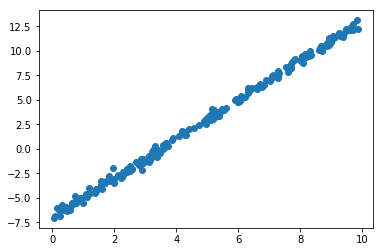

In [87]:
rs = np.random.RandomState(42)

x = 10 * rs.rand(200)
y = -7 + 2*x + 0.3*rs.randn(200)
plt.scatter(x,y)

In [93]:
X = x.reshape((len(x), -1))
X;
y;

##### Using Sklearn models

In [94]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression(fit_intercept=True)
X = x.reshape((len(x), -1))
model_LR.fit(X,y)
print(model_LR.coef_[0], model_LR.intercept_)

1.9976578679547503 -6.9684396547117515


In [21]:
## Error/Loss function
from numpy import *
# y = mx + b
# m is slope, b is y-intercept
## ADAM
## convex opt
def error(b, m, points): ## error = f(b,m) partial(f)/ partial(b)
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

$$ X\beta = y$$

$$\hat{\beta} = argmin _{\beta}S(\beta)$$
Solution:
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [98]:
def regular_function(points):
    ## how to vectorize this function?
    N = float(len(points))
    Sx = 0
    Sy = 0
    Sxx = 0
    Sxy = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        Sx += 1/N*x
        Sy += 1/N*y
        Sxy += 1/N*x*y
        Sxx += 1/N*x*x
    
    M,q = matrix([[Sx, 1],[Sxx, Sx]]), array([Sy, Sxy])
    z = linalg.solve(M,q)    
    
    return [z[0], z[1]]

points = np.array((x,y)).T

[mopt, bopt] = regular_function(points)
print(mopt, bopt)
error(bopt, mopt, points)

1.997657867954749 -6.968439654711745


0.08404435807118818

In [96]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return (new_b, new_m)

In [97]:
learning_rate = 0.01

b = 0.9 # initial y-intercept guess
m = -5 # initial slope guess
num_iterations = 1000

print(b, m, error(b, m, points))
print("Running...")
for i in range(num_iterations):
    b, m = step_gradient(b, m, array(points), learning_rate)

    if i%100 == 0:
        print("Iteration {}: Error = {}".format(i, error(b, m, points)))
        print("Current b = {}, m = {}".format(b,m))

print("Final b = {}, m = {}".format(b,m))
    

0.9 -5 1099.8128678350943
Running...
Iteration 0: Error = 147.91200550203655
Current b = 1.4200132121772207, m = -1.272142831007805
Iteration 100: Error = 7.151636938305729
Current b = -1.8500792435547546, m = 1.2189976875295523
Iteration 200: Error = 2.538779727520591
Current b = -3.9519804882484495, m = 1.5387615710695892
Iteration 300: Error = 0.9366296854820539
Current b = -5.190716873973917, m = 1.7272115081833797
Iteration 400: Error = 0.38016659982604556
Current b = -5.920754898925845, m = 1.838272765023991
Iteration 500: Error = 0.18689433594755564
Current b = -6.3509961706097995, m = 1.9037257068499585
Iteration 600: Error = 0.1197664905475667
Current b = -6.60455495184235, m = 1.9422998029438092
Iteration 700: Error = 0.09645146573429209
Current b = -6.753987513921989, m = 1.9650330957179358
Iteration 800: Error = 0.08835362826007304
Current b = -6.842054235575795, m = 1.9784307550978675
Iteration 900: Error = 0.08554106544772157
Current b = -6.893955557181427, m = 1.98632654

## Problem 7(Split dataset in Sklearn)   
### We will talk about this in further project

The following code will help you download a dataset describing the housing price, location, etc. in California. 

In [99]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [100]:
fetch_housing_data()

In [101]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [102]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


For Machine Learning Project, we need to train our model on training set and fine-tune our model in validation set, then test the performance on test set.

Try to use diffefent ways to get a test set of the housing data, set aside the remaining part as training set. Typically we split ***20%*** of the dataset as test set.

Hint: There are different ways for doing it, including np.random.permutaion, sklearn.model_selection.train_test_split

In [104]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [30]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [103]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [2]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# import hashlib
# def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#     return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]